# Lab 5: Linear Regression 

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.formula.api as smf

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For today's lab, we will explore a real world dataset - Singapore HDB resale prices and see if we can build a linear regression model that is able to predict a flat's resale price. Remember to look through the data dictionary to understand the data attributes https://data.gov.sg/dataset/resale-flat-prices

In [2]:
hdb = pd.read_csv('data/resale-flat-prices-based-on-registration-date-from-march-2012-onwards.csv')

#### 1. How many rows and columns does the dataset have?

In [3]:
hdb.shape

(96631, 10)

#### 2. What is the outcome / dependent variable we are trying to predict?

In [4]:
hdb.columns

Index([u'month', u'town', u'flat_type', u'block', u'street_name',
       u'storey_range', u'floor_area_sqm', u'flat_model',
       u'lease_commence_date', u'resale_price'],
      dtype='object')

Resale price

#### We will apply some basic transformations to create additional columns which will be useful for our model 

- **apply**: applies a function on the dataframe
- **lambda**: python anonymous function syntax, alternative to defining and creating a function separately

In [5]:
hdb = hdb.rename(columns={'month': 'year-month'})
hdb['year'] = hdb['year-month'].apply(lambda x: int(x.split("-")[0]))
hdb['month'] = hdb['year-month'].apply(lambda x: int(x.split("-")[1]))
hdb['lower_storey_bound'] = hdb['storey_range'].apply(lambda x: int(x.split()[0]))
hdb['upper_storey_bound'] = hdb['storey_range'].apply(lambda x: int(x.split()[2]))
hdb['flat_age'] = hdb['year'] - hdb['lease_commence_date']

In [10]:
hdb.head()

,year-month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,month,lower_storey_bound,upper_storey_bound,flat_age
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0,2012,3,6,10,26
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0,2012,3,1,5,32
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0,2012,3,6,10,32
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0,2012,3,1,5,28
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0,2012,3,6,10,32


#### 3. Plot the distribution of resale prices using the distplot function from the seaborn (sns) library

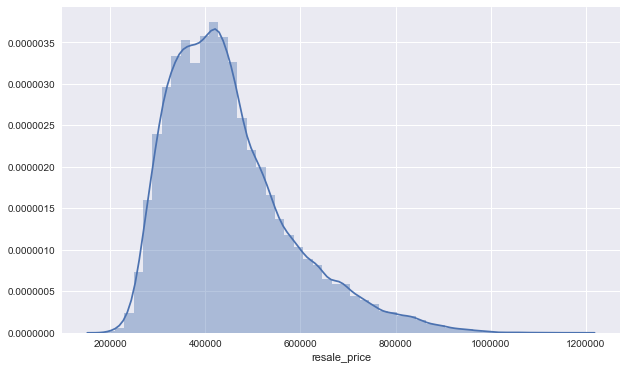

In [12]:
plt.figure(figsize=(10,6))
sns.distplot(hdb["resale_price"])
plt.show()

#### 4. Using additional summary statistics as required, describe the distribution of resale prices 

In [13]:
hdb["resale_price"].describe()

count    9.663100e+04
mean     4.502107e+05
std      1.298110e+05
min      1.900000e+05
25%      3.550000e+05
50%      4.250000e+05
75%      5.150000e+05
max      1.180000e+06
Name: resale_price, dtype: float64

In [14]:
hdb["resale_price"].skew()

1.0774678710926375

Resale flat prices have a mean of 450k and a median of 425k with a standard deviation of 130k. The distribution is positively skewed.

#### 5. Create a scatter plot of resale_price and floor_area_sqm using the pairplot function from Seaborn and include a regression line

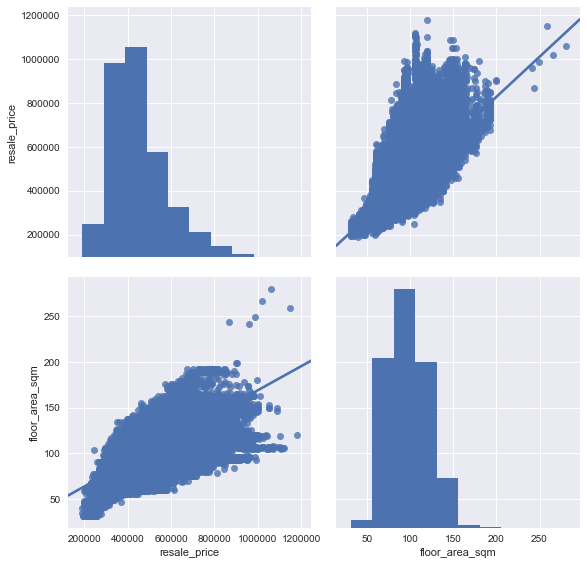

In [15]:
sns.pairplot(hdb[["resale_price", "floor_area_sqm"]], kind="reg", size=4)

There looks to be a strong linear correlation between floor_area_sqm and resale_price

#### 6. Using smf.ols from the Statsmodel library, create a fitted model of resale_price against floor_area_sqm 

In [16]:
lm = smf.ols(formula="resale_price ~ floor_area_sqm", data=hdb).fit()

In [17]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           resale_price   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                 8.978e+04
Date:                Sat, 17 Jun 2017   Prob (F-statistic):               0.00
Time:                        14:26:28   Log-Likelihood:            -1.2431e+06
No. Observations:               96631   AIC:                         2.486e+06
Df Residuals:                   96629   BIC:                         2.486e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept       9.678e+04   1217.255     79.510      0.000      9.44e+04  9.92e+04
floor_area_sqm  3659.7690     12.214    299.632      0.000      3635.829  3683.709
==============================================================================
Omnibus:                    31857.247   Durbin-Watson:                   0.488
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           108914.981
Skew:                           1.673   Prob(JB):                         0.00
Kurtosis:                       6.981   Cond. No.                         404.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 7. What is the association between floor_area_sqm and resale_price? Is the association statistically significant? What is the R-squared value? 

Association is 3659, i.e. an increase of one square metre in floor area is associated with an increase in $3,659 of the resale_price. The p-value is < 0.05 and hence the association is statistically significant. The R-squared value is 0.482 which means that the area of the flat is able to explain 48 percent of the variance.

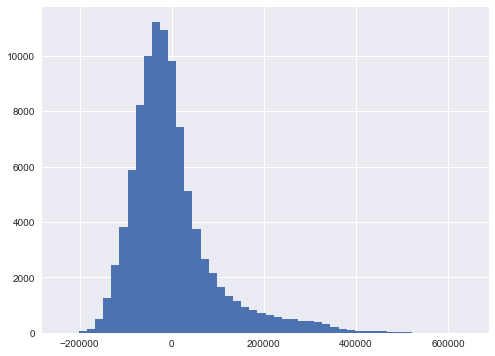

In [18]:
y_preds = lm.predict(hdb[["floor_area_sqm"]])
residuals = hdb["resale_price"] - y_preds
plt.figure(figsize=(8,6))
plt.hist(residuals, bins=50)
plt.show()

Looking at the residuals plot, we observe that a signicant amount of variance in the resale price of HDB flats are still not accounted for.

#### 8. For practice, let's create the same linear model but using LinearRegression() from Scikit learn instead. Are the model coefficients the same?  

In [19]:
feature_cols = ['floor_area_sqm']
X = hdb[feature_cols]
y = hdb["resale_price"]

linreg = LinearRegression().fit(X, y)
# print the coefficients
print linreg.intercept_
print linreg.coef_

96783.4081041
[ 3659.76896828]


#### 9. Let's include a more quantitative variables into the model. Compute the correlations between floor_area_sqm, lower_storey_bound, upper_storey_bound, flat_age, and resale_price 

In [20]:
hdb[["floor_area_sqm", "lower_storey_bound", "upper_storey_bound", "flat_age", "resale_price"]].corr()

,floor_area_sqm,lower_storey_bound,upper_storey_bound,flat_age,resale_price
floor_area_sqm,1.000000,0.046139,0.046846,-0.434956,0.693993
lower_storey_bound,0.046139,1.000000,0.995036,-0.215444,0.332341
upper_storey_bound,0.046846,0.995036,1.000000,-0.219949,0.333720
flat_age,-0.434956,-0.215444,-0.219949,1.000000,-0.402546
resale_price,0.693993,0.332341,0.333720,-0.402546,1.000000


#### 10. Using the heatmap function from the Seaborn library, display the correlation matrix as a heatmap 

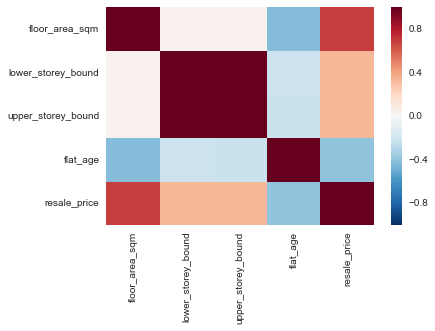

In [21]:
sns.heatmap(hdb[["floor_area_sqm", "lower_storey_bound", "upper_storey_bound", "flat_age", "resale_price"]].corr())

Notice the presence of multicollinearity (high correlation between the lower and upper storey bounds). This is a trivial example as we derived both of these columns from the same original column but serves as a reminder about the importance of checking the correlations between variables before we include them in the model construction

#### 11. Using pairplot from the Seaborn library, create scatter plots of floor_area_sqm, upper_storey_bound and flat_age against resale_price 

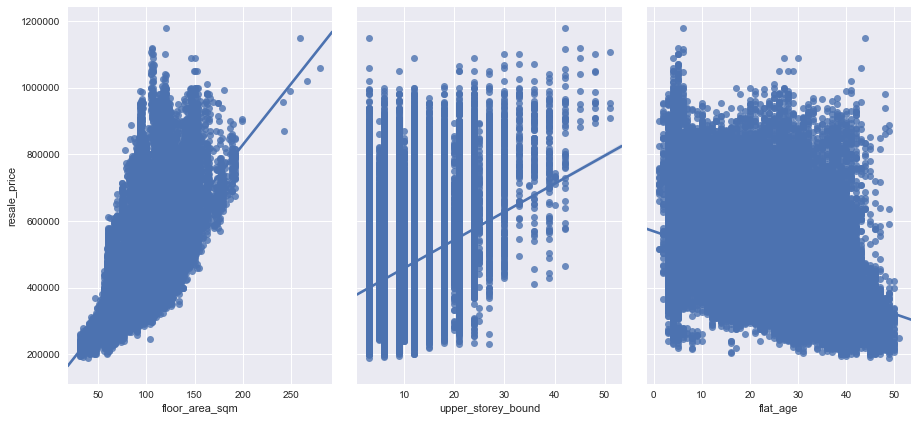

In [22]:
sns.pairplot(hdb, x_vars=["floor_area_sqm", "upper_storey_bound", "flat_age"], y_vars="resale_price", size=6, aspect=0.7, kind='reg')

#### 11. Using smf.ols from the Statsmodel library, lets create a multi-variate model including the variables floor_area_sqm, upper_storey_bound and flat_age to determine resale_prices

In [23]:
lm2 = smf.ols(data = hdb, formula = "resale_price ~ floor_area_sqm + upper_storey_bound + flat_age").fit()

In [24]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           resale_price   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                 4.352e+04
Date:                Sat, 17 Jun 2017   Prob (F-statistic):               0.00
Time:                        14:33:27   Log-Likelihood:            -1.2335e+06
No. Observations:               96631   AIC:                         2.467e+06
Df Residuals:                   96627   BIC:                         2.467e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept           6.476e+04   1780.270     36.378      0.000      6.13e+04  6.83e+04
floor_area_sqm      3467.4482     12.306    281.766      0.000      3443.328  3491.568
upper_storey_bound  7353.5127     54.361    135.271      0.000      7246.965  7460.060
flat_age            -645.2572     29.389    -21.956      0.000      -702.860  -587.655
==============================================================================
Omnibus:                    20475.548   Durbin-Watson:                   0.548
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46116.822
Skew:                           1.213   Prob(JB):                         0.00
Kurtosis:                       5.359   Cond. No.                         670.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 12. What are the coefficients of the predictors now? Are they statistically significant? How as the coefficient for floor_area_sqm changed in this new model?

The coefficients are floor_area_sqm : 3467, upper_storey_bound: 7353 and flat_age: -645. All three of the coefficients are statistically significant. The coefficient for floor_area_sqm has decreased slightly as part of the variance is now explained by the storey level.

#### Intuitively, the area of the flat i.e. town should have an association with the flat_price, let's explore this association 

In [25]:
sns.boxplot?

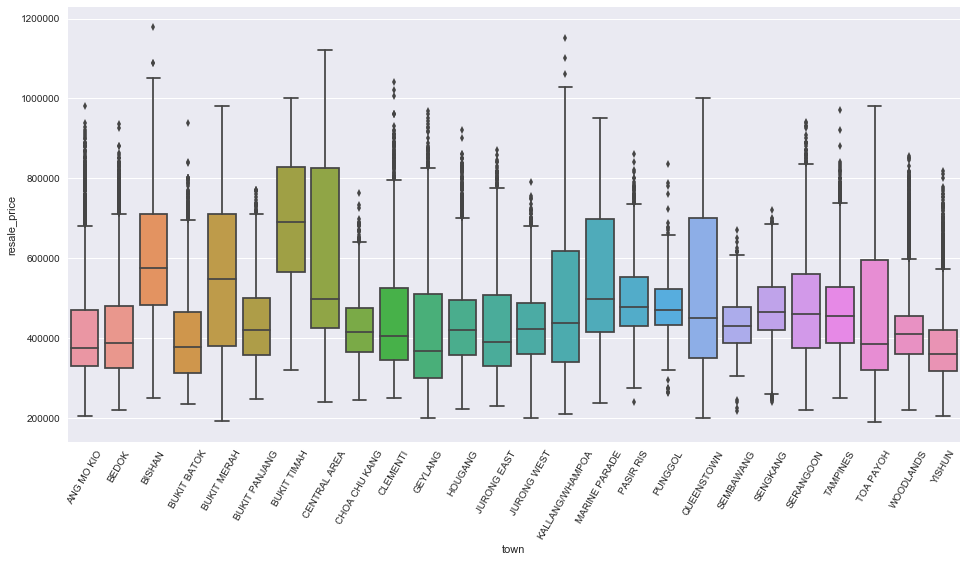

In [20]:
plt.figure(figsize=(16,8))
g = sns.boxplot(hdb["town"], hdb["resale_price"])
g.set_xticklabels(g.get_xticklabels(), rotation=60)
plt.show()

#### 13. Let's add the town variable into the linear regression model. With smf.ols we can easily add a categorical value in the formula via "Y ~ cont_var1 + cont_var2 + C(categorical_var1)" 

In [26]:
lm3 = smf.ols(data = hdb, formula = "resale_price ~ floor_area_sqm + upper_storey_bound + flat_age + C(town)").fit()

In [27]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           resale_price   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                 1.646e+04
Date:                Sat, 17 Jun 2017   Prob (F-statistic):               0.00
Time:                        14:36:19   Log-Likelihood:            -1.1901e+06
No. Observations:               96631   AIC:                         2.380e+06
Df Residuals:                   96602   BIC:                         2.381e+06
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
Intercept                   1.835e+05   1480.860    123.900      0.000      1.81e+05  1.86e+05
C(town)[T.BEDOK]           -2.178e+04   1039.503    -20.951      0.000     -2.38e+04 -1.97e+04
C(town)[T.BISHAN]           5.833e+04   1520.010     38.376      0.000      5.54e+04  6.13e+04
C(town)[T.BUKIT BATOK]     -7.401e+04   1176.659    -62.897      0.000     -7.63e+04 -7.17e+04
C(town)[T.BUKIT MERAH]      8.646e+04   1186.189     72.887      0.000      8.41e+04  8.88e+04
C(town)[T.BUKIT PANJANG]   -1.333e+05   1256.785   -106.042      0.000     -1.36e+05 -1.31e+05
C(town)[T.BUKIT TIMAH]      1.594e+05   3834.545     41.563      0.000      1.52e+05  1.67e+05
C(town)[T.CENTRAL AREA]     1.259e+05   2078.331     60.564      0.000      1.22e+05   1.3e+05
C(town)[T.CHOA CHU KANG]   -1.619e+05   1198.530   -135.102      0.000     -1.64e+05  -1.6e+05
C(town)[T.CLEMENTI]          3.23e+04   1352.715     23.878      0.000      2.96e+04   3.5e+04
C(town)[T.GEYLANG]           1.45e+04   1298.624     11.168      0.000       1.2e+04   1.7e+04
C(town)[T.HOUGANG]          -7.49e+04   1115.298    -67.159      0.000     -7.71e+04 -7.27e+04
C(town)[T.JURONG EAST]      -5.57e+04   1392.124    -40.009      0.000     -5.84e+04  -5.3e+04
C(town)[T.JURONG WEST]     -1.161e+05   1029.487   -112.776      0.000     -1.18e+05 -1.14e+05
C(town)[T.KALLANG/WHAMPOA]  4.175e+04   1272.904     32.800      0.000      3.93e+04  4.42e+04
C(town)[T.MARINE PARADE]    1.361e+05   2231.153     60.999      0.000      1.32e+05   1.4e+05
C(town)[T.PASIR RIS]       -1.182e+05   1286.321    -91.851      0.000     -1.21e+05 -1.16e+05
C(town)[T.PUNGGOL]         -1.213e+05   1320.595    -91.825      0.000     -1.24e+05 -1.19e+05
C(town)[T.QUEENSTOWN]       9.525e+04   1322.111     72.046      0.000      9.27e+04  9.78e+04
C(town)[T.SEMBAWANG]       -1.652e+05   1420.329   -116.340      0.000     -1.68e+05 -1.62e+05
C(town)[T.SENGKANG]        -1.203e+05   1139.567   -105.593      0.000     -1.23e+05 -1.18e+05
C(town)[T.SERANGOON]        -1.42e+04   1417.382    -10.016      0.000      -1.7e+04 -1.14e+04
C(town)[T.TAMPINES]        -5.828e+04   1041.306    -55.966      0.000     -6.03e+04 -5.62e+04
C(town)[T.TOA PAYOH]        3.035e+04   1258.069     24.121      0.000      2.79e+04  3.28e+04
C(town)[T.WOODLANDS]        -1.49e+05   1049.558   -141.995      0.000     -1.51e+05 -1.47e+05
C(town)[T.YISHUN]          -9.158e+04   1053.382    -86.943      0.000     -9.36e+04 -8.95e+04
floor_area_sqm              3980.5355      8.348    476.836      0.000      3964.174  3996.897
upper_storey_bound          4146.0168     36.366    114.007      0.000      4074.739  4217.294
flat_age                   -3962.4815     23.334   -169.815      0.000     -4008.216 -3916.747
===========================================

#### What is the R-squared value now after adding the town variable in? What is the interpretation of the town coefficients? 

The R-squared value is 0.827 now! We are able to explain 82.7% of the variance in flat prices. All the town variables are significant and they represent the difference in price of a flat with same area, storey, and age compared to a flat in Ang Mo Kio (base / reference variable)

#### 14. Let's use our model to predict the prices of new BTO flats

In [28]:
new_release = pd.DataFrame({'upper_storey_bound': [12, 5], 'floor_area_sqm': [100, 120], 'flat_age': [5, 5], 
                           'town': ['BUKIT BATOK', 'SENGKANG']})

In [29]:
lm3.predict(new_release)

array([ 537463.70676513,  541729.97942076])

#### 15. What are the assumptions and limitations of our model? 

#### Bonus: Can you improve the model further? 

#### Bonus: Can you create the model using Sklearn's LinearRegression? 

In [30]:
town_dummies = pd.get_dummies(hdb.town, drop_first=True, prefix='TOWN')
hdb_town = pd.concat([hdb, town_dummies], axis=1)

In [29]:
factors = np.concatenate((town_dummies.columns, ["upper_storey_bound", "floor_area_sqm", "flat_age"]), axis=0)
y = hdb_town["resale_price"]
X = hdb_town[factors]
linreg = LinearRegression().fit(X, y)

In [30]:
new_release2 = pd.get_dummies(new_release, prefix="TOWN")
new_release2 = new_release2.reindex(columns = factors, fill_value=0)

In [31]:
linreg.predict(new_release2)

array([ 537463.70676514,  541729.97942075])